In [1]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
datos=[]
with open('2022 MLB Player Stats - Batting.csv',newline='',encoding='utf-8') as archivo_csv:
    lector_csv=csv.DictReader(archivo_csv,delimiter=';')
    for fila in lector_csv:
        datos.append(fila)


#casteando la entrada
llaves=list(datos[0])
for columna in llaves:
    if not columna in ["Name", "Tm", "Lg"]:
        if not columna in ["BA", "OBP", "SLG", "OPS", "OPS+"]:
            for fila in datos:
                fila[columna]=int(fila[columna])
        else:
            for fila in datos:
                fila[columna]=float(fila[columna])

In [3]:
Over25_2D_NL=list(filter(lambda x: x['2B']>25 and x["Lg"]=="NL" , datos))

#El primer supuesto menciona que debe existir una relacion lineal entre las variables 
#dependientes y las independientes. Y solo hay dos variables que cumplen, por lo que al 
#aplicar el metodo foward no importa el orden en que tome la variable
#Las variables tomadas seran RBI y TB

Matriz=np.array(
    [
        [
            len(Over25_2D_NL),
            sum(map(lambda x:x['RBI'],Over25_2D_NL)),
            sum(map(lambda x:x['TB'],Over25_2D_NL))
        ],
        [
            sum(map(lambda x:x['RBI'],Over25_2D_NL)),
            sum(map(lambda x:x['RBI']*x['RBI'],Over25_2D_NL)),
            sum(map(lambda x:x['RBI']*x['TB'],Over25_2D_NL))
        ],
        [
            sum(map(lambda x:x['TB'],Over25_2D_NL)),
            sum(map(lambda x:x['TB']*x['RBI'],Over25_2D_NL)),
            sum(map(lambda x:x['TB']*x['TB'],Over25_2D_NL))
        ]
    ]
)

vector=np.array(
    [
        sum(map(lambda x:x['HR'],Over25_2D_NL)),
        sum(map(lambda x:x['RBI']*x['HR'],Over25_2D_NL)),
        sum(map(lambda x:x['TB']*x['HR'],Over25_2D_NL))
    ]   
)

c=np.linalg.solve(Matriz,vector)

print('a)')
print("La regresion lineal multiple realizada con el metodo foward resulto:")
print("HR = "+str(c[0])+" + "+str(c[1])+"*RBI + "+str(c[2])+"*TB")

a)
La regresion lineal multiple realizada con el metodo foward resulto:
HR = -14.093237249753416 + 0.2542475451793053*RBI + 0.06350788243921907*TB


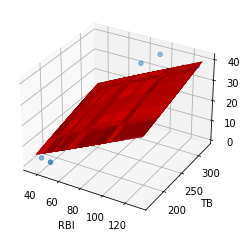

In [4]:
#Graficando
HRdata=np.array(list(map(lambda x:x['HR'],Over25_2D_NL)))
RBIdata=np.array(list(map(lambda x:x['RBI'],Over25_2D_NL)))
TBdata=np.array(list(map(lambda x:x['TB'],Over25_2D_NL)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(RBIdata, TBdata, HRdata)

ax.set_xlabel('RBI')
ax.set_ylabel('TB')
ax.set_zlabel('HR')

X,Y=np.meshgrid(RBIdata,TBdata)
Z=c[0]+c[1]*X+c[2]*Y
ax.plot_surface(X,Y,Z,alpha=0.5,color='red')

plt.show()
